In [45]:
print("Jeyavvanth.R")
print("21BCE2472")

#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

Jeyavvanth.R
21BCE2472


# Task 1. Loading the Dataset

In [46]:
df=pd.read_csv(r"/content/Mall_Customers.csv")
df=df.drop(['CustomerID'],axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [47]:
df.shape

(200, 4)

# Task 2. Data Preprocessing Including Visualization

Visualization


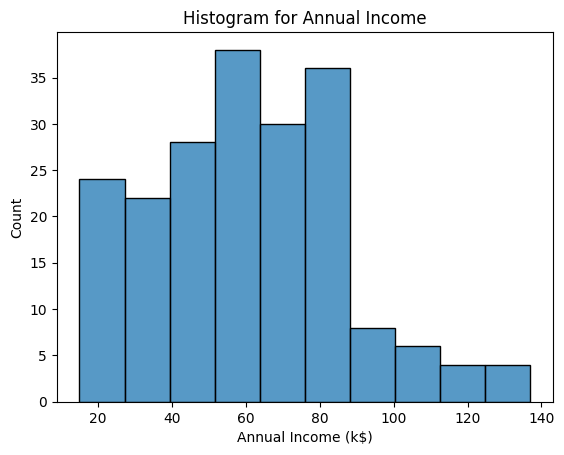

In [48]:
# Univariate Analysis - 1.

sns.histplot(df['Annual Income (k$)'])
plt.title('Histogram for Annual Income')
plt.show()

<ipython-input-49-26a103b301bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual Income (k$)'])


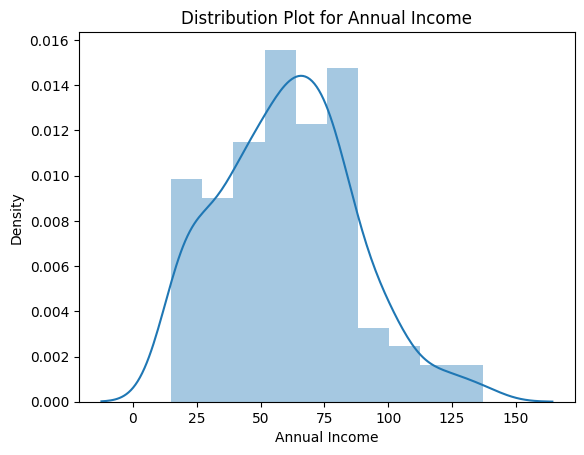

In [49]:
# Univariate Analysis - 2.

sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution Plot for Annual Income')
plt.xlabel('Annual Income')
plt.show()

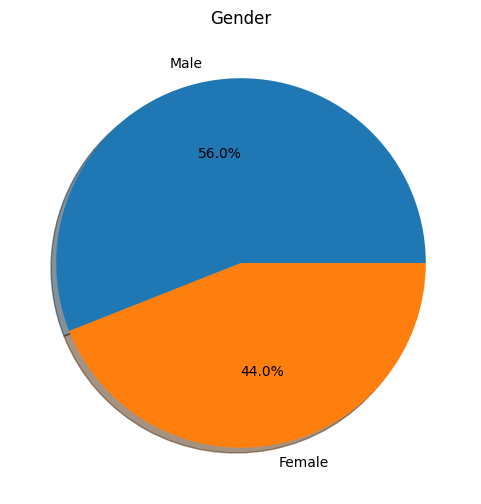

In [50]:
# Univariate Analysis - 3.

x = df.Gender.unique().tolist()

fig = plt.figure(figsize=(6, 6))
fig.patch.set_facecolor('white')

plt.pie(df.Gender.value_counts(),labels = x,autopct ='%1.1f%%',shadow = True)
plt.title('Gender')
plt.show()

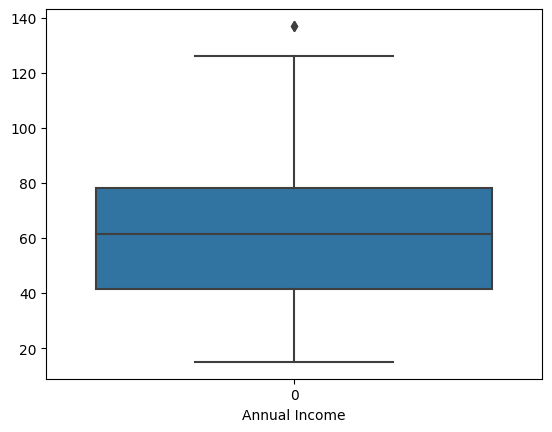

In [51]:
# Univariate Analysis 4.

sns.boxplot(df['Annual Income (k$)'])
plt.xlabel('Annual Income')
plt.show()

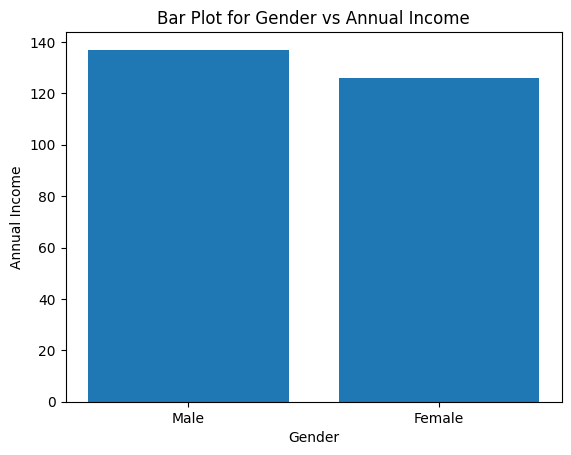

In [52]:
# Bivaraiate Analysis - 1.

x= df['Gender']
y= df['Annual Income (k$)']

plt.bar(x,y)
plt.title('Bar Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')

plt.show()

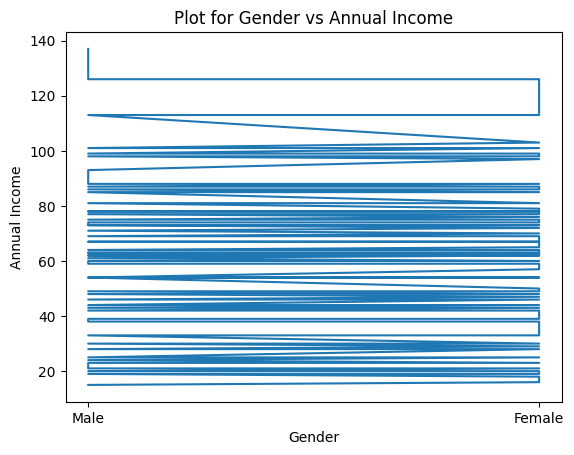

In [53]:
# Bivaraiate Analysis - 2.

plt.plot(x,y)
plt.title('Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

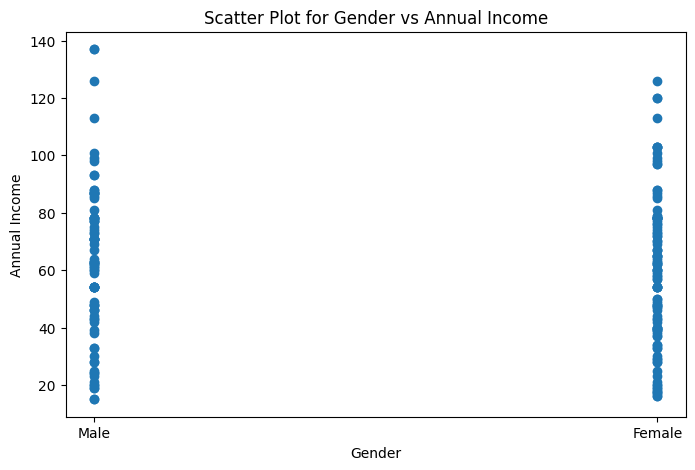

In [54]:
# Bivaraiate Analysis - 3.

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.title('Scatter Plot for Gender vs Annual Income')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()


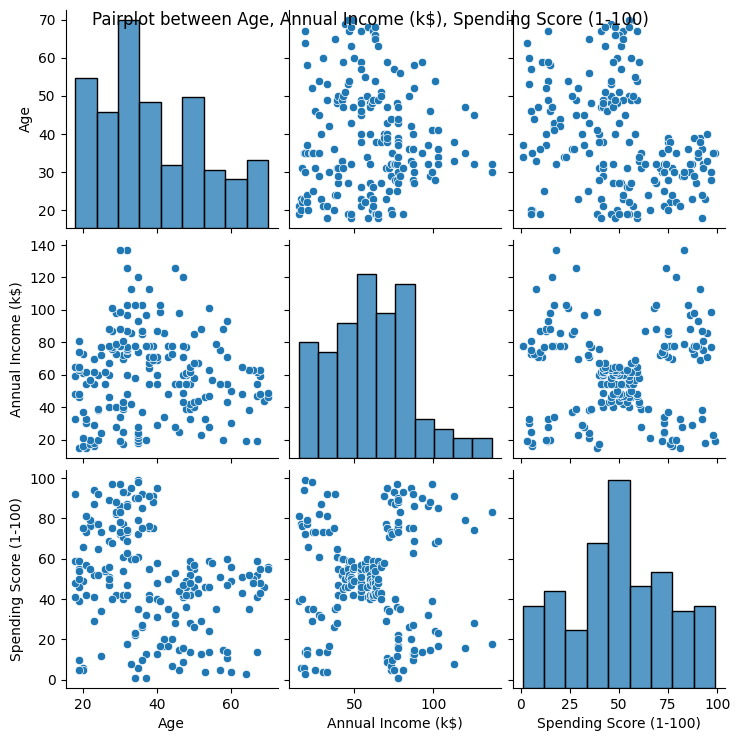

In [55]:
# Multivariate Analysis - 1.
num = df.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(df, vars=num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}',ha="center")

plt.show()


<ipython-input-56-15897c16474c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)


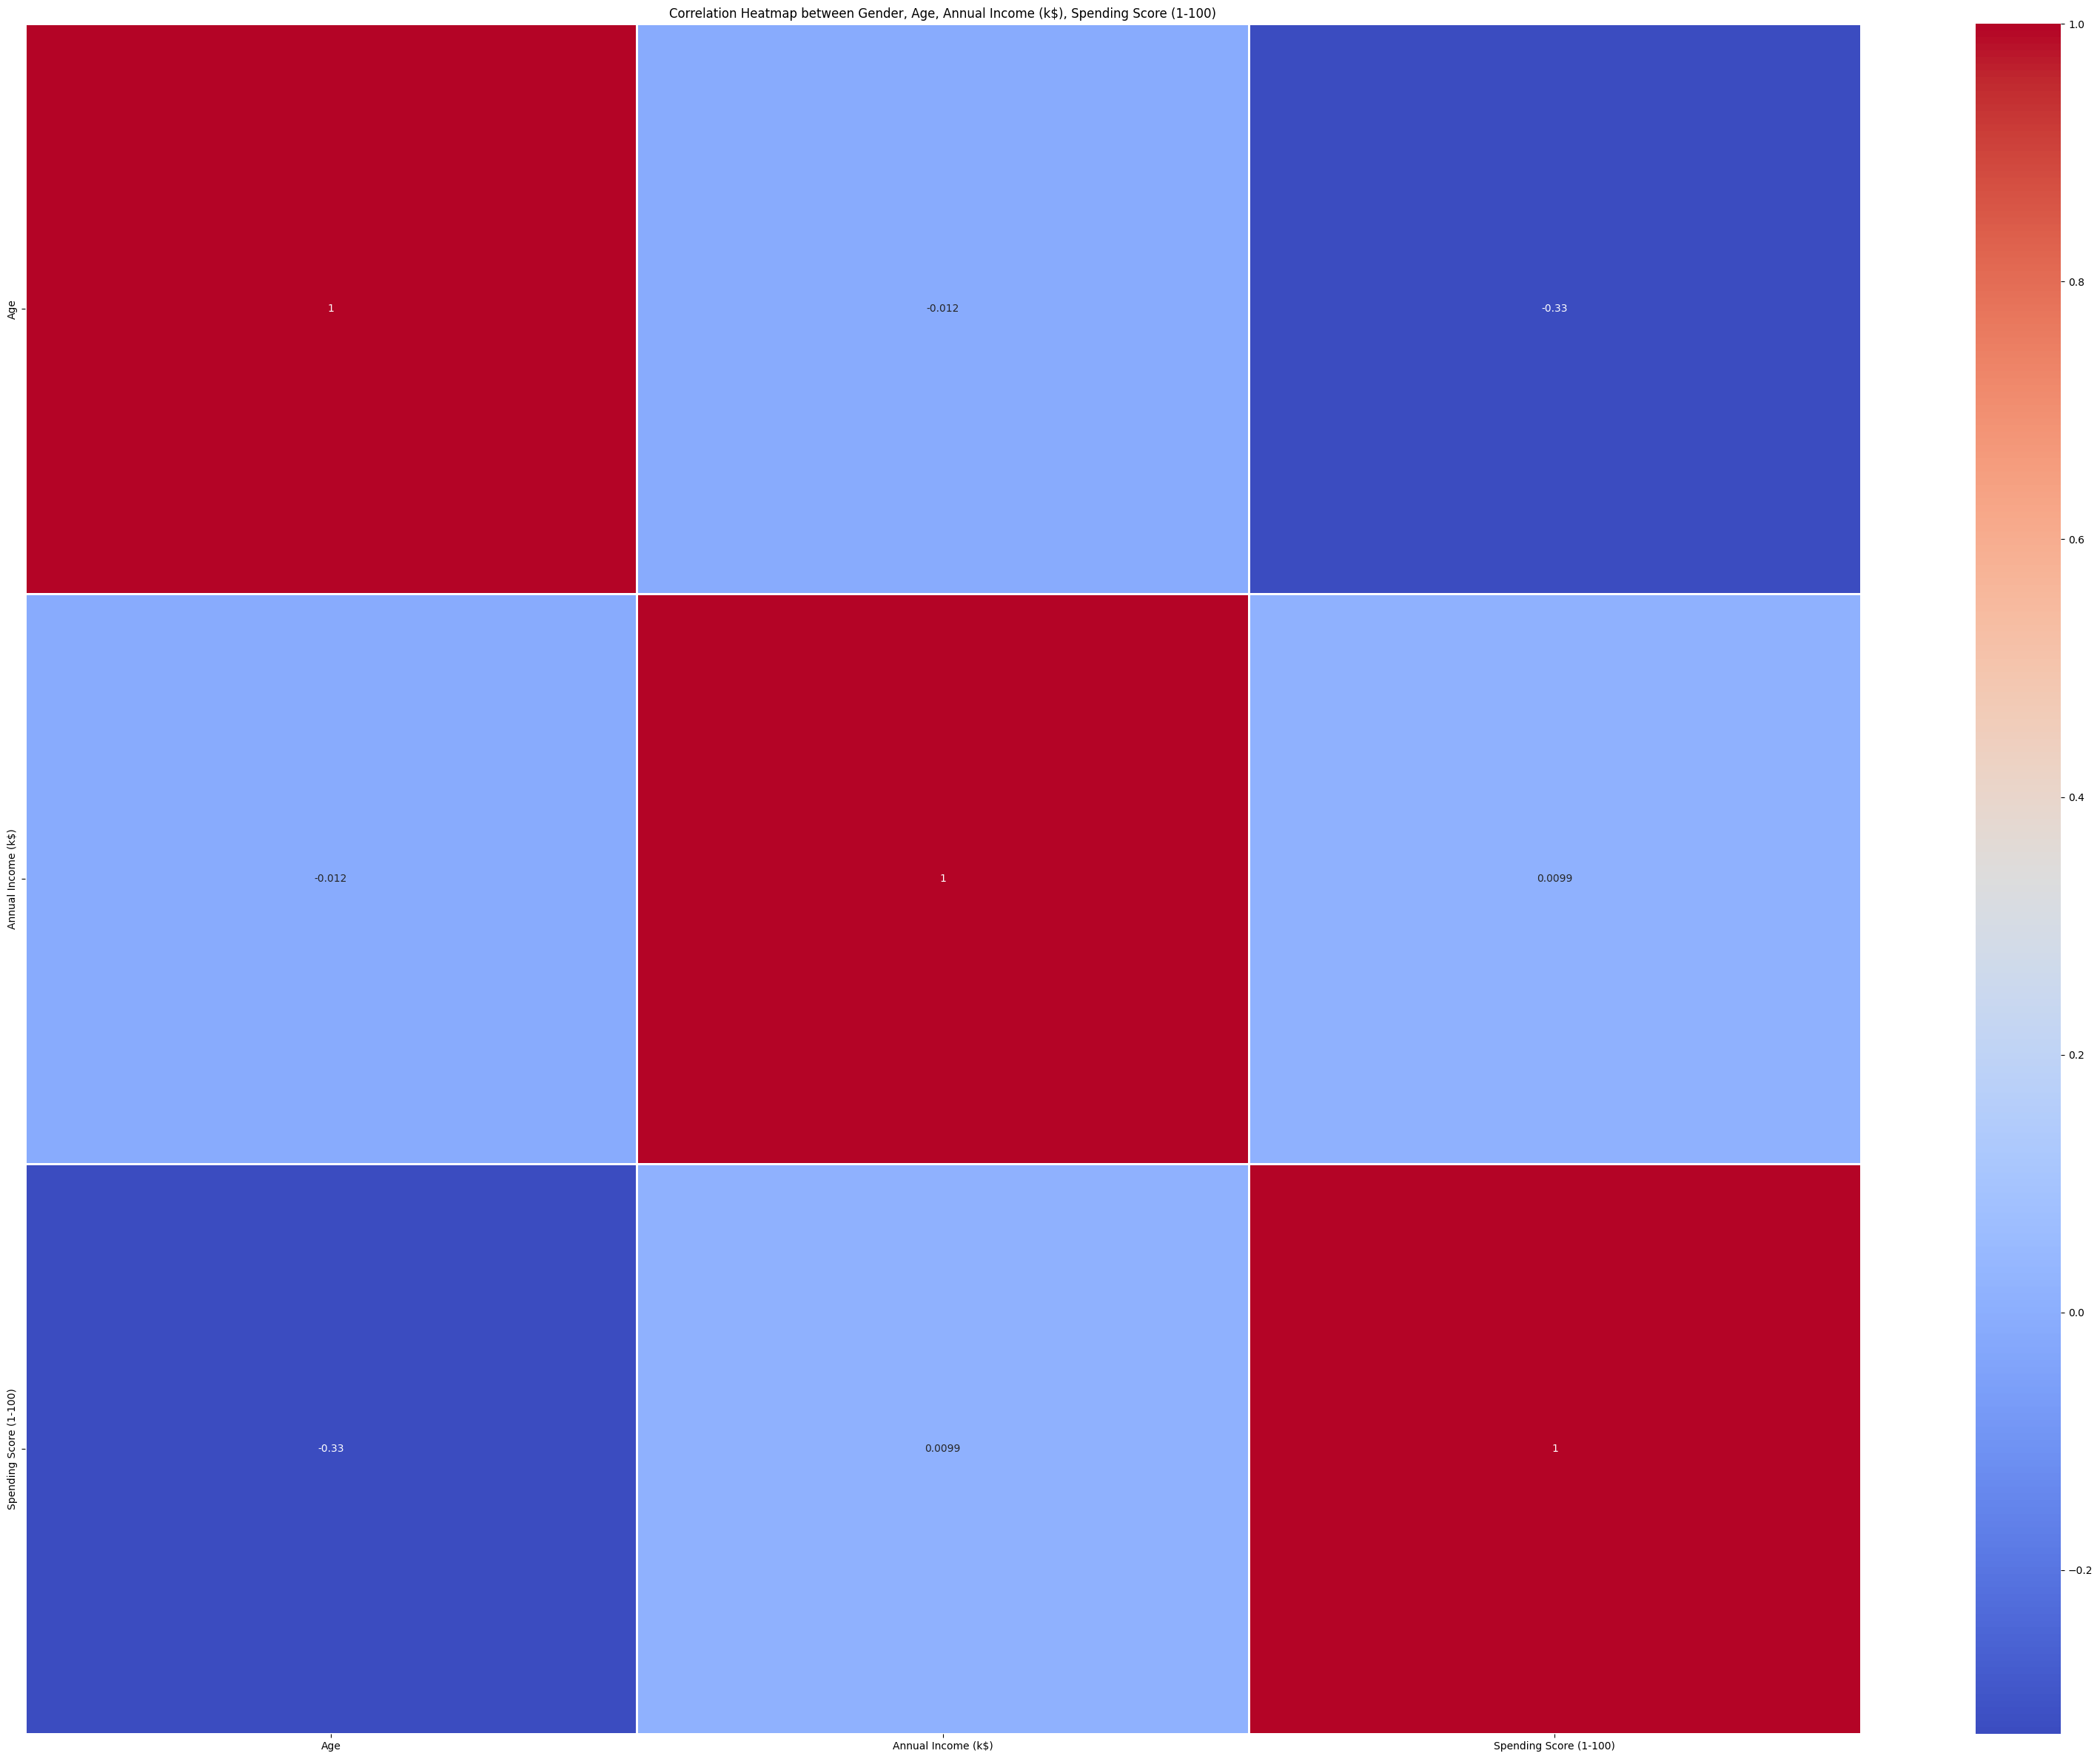

In [56]:
# Multivariate Analysis - 2.

l=df.columns.tolist()
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

Data Preprocessing

In [57]:
# Descriptive Statistics.

df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [58]:
# Handling the Missing Values.

df.isnull().sum()

# There is null values which has to be handled.

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [60]:
# Encoding the Gender Column

le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)

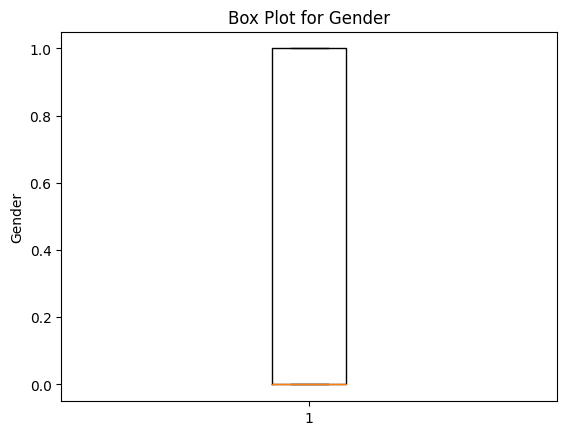

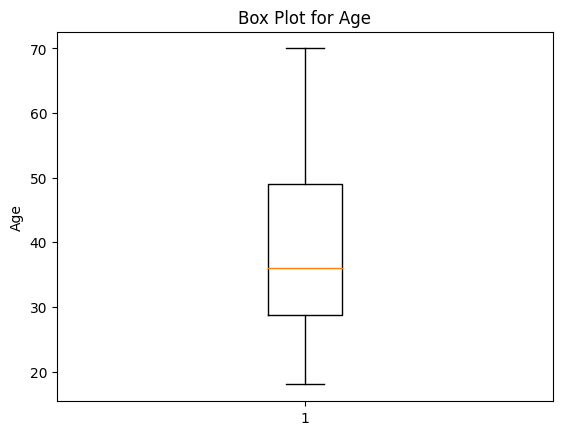

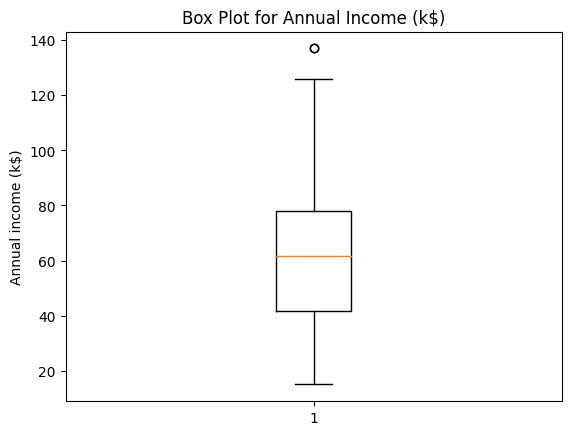

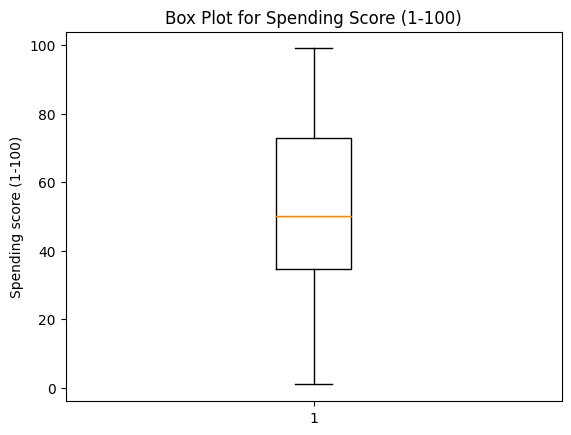

In [61]:
# Finding the outliers and Replacing them. Replacement with Median

# Replacement of Outliers in Culmen Length.

for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()


In [62]:
# Finding the Number of Outliers.

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))


Number of Outliers in Gender: 0
Number of Outliers in Age: 0
Number of Outliers in Annual Income (k$): 2
Number of Outliers in Spending Score (1-100): 0


In [63]:
# Outlier Replacement by Median.

def replace_outliers_with_median(data, column, lower_bound, upper_bound):
    median = data[column].median()
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df = replace_outliers_with_median(df, i, lower_bound, upper_bound)

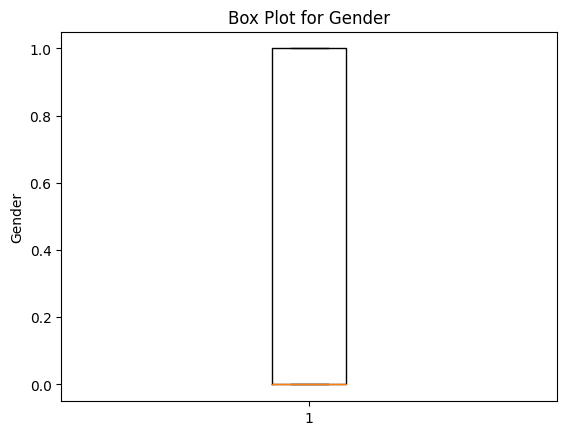

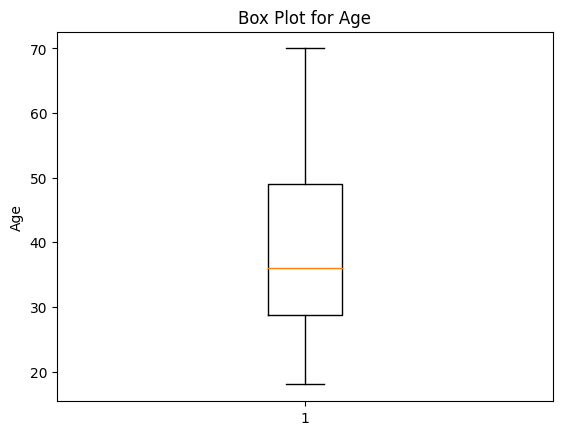

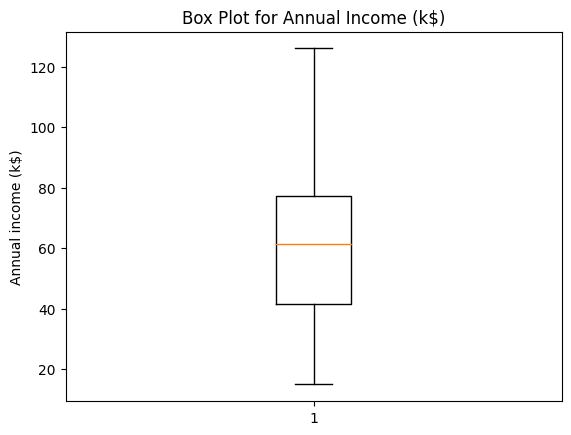

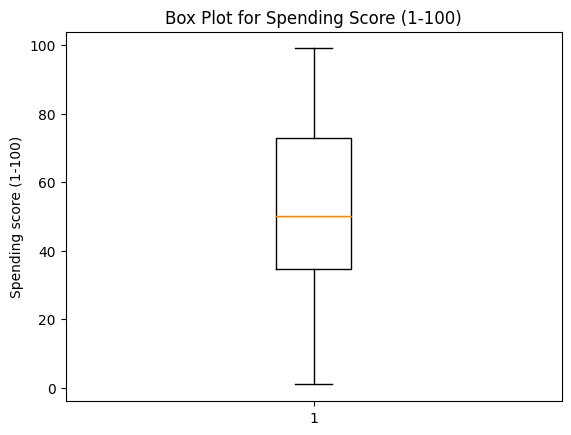

In [64]:
# Rechecking for any outliers

for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()


In [65]:
# Rechecking for the number of outliers.

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))

Number of Outliers in Gender: 0
Number of Outliers in Age: 0
Number of Outliers in Annual Income (k$): 0
Number of Outliers in Spending Score (1-100): 0


In [66]:
# Scaling
scale =MinMaxScaler()
df=pd.DataFrame(scale.fit_transform(df),columns =df.columns)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


# Task 3. Model Building

Model Building

In [67]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(df)
  error.append(kmeans.inertia_)

error

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[87.64248645238291,
 38.256261727718496,
 30.53615452035327,
 23.37397528270042,
 20.102172077784857,
 17.128172918518988,
 14.850573520364879,
 12.608723763869847,
 10.917668890407121,
 9.591940516007261]

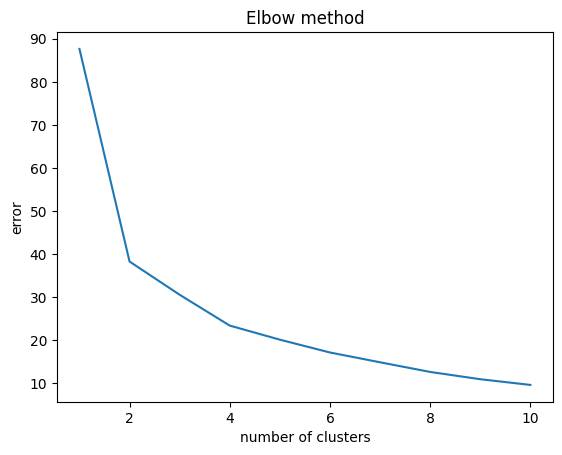

In [68]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [69]:
km_model = cluster.KMeans(n_clusters=4,init = 'k-means++',random_state=0)
km_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [70]:
pred = km_model.predict(df)
pred

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3], dtype=int32)

Testing the Model

In [71]:
km_model.predict([[0.0,0.019231,1.000000,0.387755]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [72]:
km_model.predict([[1.0,0.038462,0.09009,0.051020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)